# Data Analysis and Preprocessing for Thermal Stability Dataset

### Importing all the dependencies

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

### Loading dataset from Github [It may take some time]

In [106]:
#https://raw.githubusercontent.com/Shown246/CSE445_Datasets/refs/heads/main/thermal-stability.csv
df = pd.read_csv('https://raw.githubusercontent.com/Shown246/CSE445_Datasets/refs/heads/main/thermal-stability.csv')
df.head()

,waveguide_material,cladding_material,waveguide_width,waveguide_height,temperature_min,temperature_max,temperature_step,thermal_expansion_coefficient,thermal_conductivity,refractive_index_core,...,thermal_tuning_efficiency,thermal_stress,strain_rate,optical_power_input,optical_power_output_min,optical_power_output_max,wavelength_min,wavelength_max,simulation_model,measurement_uncertainty
0,SU-8,Air,1.780,0.325,9.7,97.8,1,6.530000e-06,0.25,1.78614,...,63.70,66.62,0.000004,9.53,9.10,9.39,1260,1625,Finite Element Method (FEM),2.80
1,Polymethyl Methacrylate (PMMA),Air,1.660,0.484,-28.1,173.5,1,1.123000e-05,0.19,1.99646,...,78.91,47.13,0.000001,8.25,8.04,7.98,1260,1625,Finite Element Method (FEM),4.38
2,Polydimethylsiloxane (PDMS),Silicon Dioxide (SiO₂),1.493,0.377,-12.9,87.2,5,1.561800e-04,0.17,1.89949,...,80.75,52.69,0.000004,9.83,9.67,9.69,1260,1625,FDTD,3.90
3,Silicon Dioxide (SiO₂),Silicon Dioxide (SiO₂),1.439,0.823,9.8,148.7,1,7.200000e-07,1.48,1.67669,...,89.10,87.37,0.000004,5.27,4.82,5.06,1260,1625,FDTD,4.60
4,SU-8,Air,1.067,0.319,-37.5,156.8,5,9.210000e-06,0.22,1.46767,...,54.43,37.25,0.000002,4.51,4.37,4.26,1260,1625,Finite Element Method (FEM),4.60


### Checking for missing values

In [107]:
# Checking missing values
df.isnull().sum()

waveguide_material               0
cladding_material                0
waveguide_width                  0
waveguide_height                 0
temperature_min                  0
temperature_max                  0
temperature_step                 0
thermal_expansion_coefficient    0
thermal_conductivity             0
refractive_index_core            0
refractive_index_cladding        0
propagation_loss_min             0
propagation_loss_max             0
effective_index_min              0
effective_index_max              0
dn_dT                            0
thermal_tuning_efficiency        0
thermal_stress                   0
strain_rate                      0
optical_power_input              0
optical_power_output_min         0
optical_power_output_max         0
wavelength_min                   0
wavelength_max                   0
simulation_model                 0
measurement_uncertainty          0
dtype: int64

### Statistical features of the dataset

In [108]:
df.describe()

,waveguide_width,waveguide_height,temperature_min,temperature_max,temperature_step,thermal_expansion_coefficient,thermal_conductivity,refractive_index_core,refractive_index_cladding,propagation_loss_min,...,dn_dT,thermal_tuning_efficiency,thermal_stress,strain_rate,optical_power_input,optical_power_output_min,optical_power_output_max,wavelength_min,wavelength_max,measurement_uncertainty
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.0,100000.0,100000.000000
mean,1.252935,0.599759,-15.027613,139.922015,5.322680,4.503634e-05,3.915528,1.700474,1.251085,1.548305,...,0.000038,69.971498,55.040140,2.549927e-06,5.250169,4.949694,4.950034,1260.0,1625.0,2.550175
std,0.432870,0.230406,20.246527,34.714554,3.680393,8.216336e-05,6.851416,0.173286,0.144389,0.837346,...,0.000022,11.535965,25.979577,1.416079e-06,2.739690,2.742474,2.741749,0.0,0.0,1.415007
min,0.500000,0.200000,-50.000000,80.000000,1.000000,5.000000e-07,0.150000,1.400000,1.000010,0.100000,...,0.000004,50.000000,10.000000,1.000000e-07,0.500000,0.000000,0.000000,1260.0,1625.0,0.100000
25%,0.880000,0.400000,-32.600000,109.800000,1.000000,2.760000e-06,0.200000,1.550160,1.126267,0.823000,...,0.000021,60.010000,32.570000,1.320000e-06,2.880000,2.580000,2.580000,1260.0,1625.0,1.320000
50%,1.253500,0.600000,-15.000000,139.900000,5.000000,8.160000e-06,0.250000,1.700915,1.252390,1.549000,...,0.000036,69.950000,55.055000,2.550000e-06,5.245000,4.950000,4.940000,1260.0,1625.0,2.550000
75%,1.628000,0.799000,2.600000,170.000000,10.000000,1.301000e-05,1.450000,1.850210,1.375640,2.269000,...,0.000051,79.990000,77.590000,3.780000e-06,7.620000,7.320000,7.320000,1260.0,1625.0,3.770000
max,2.000000,1.000000,20.000000,200.000000,10.000000,2.999900e-04,20.000000,2.000000,1.500000,3.000000,...,0.000160,90.000000,100.000000,5.000000e-06,10.000000,9.890000,9.890000,1260.0,1625.0,5.000000


### Showing Boxplot to view Outliers

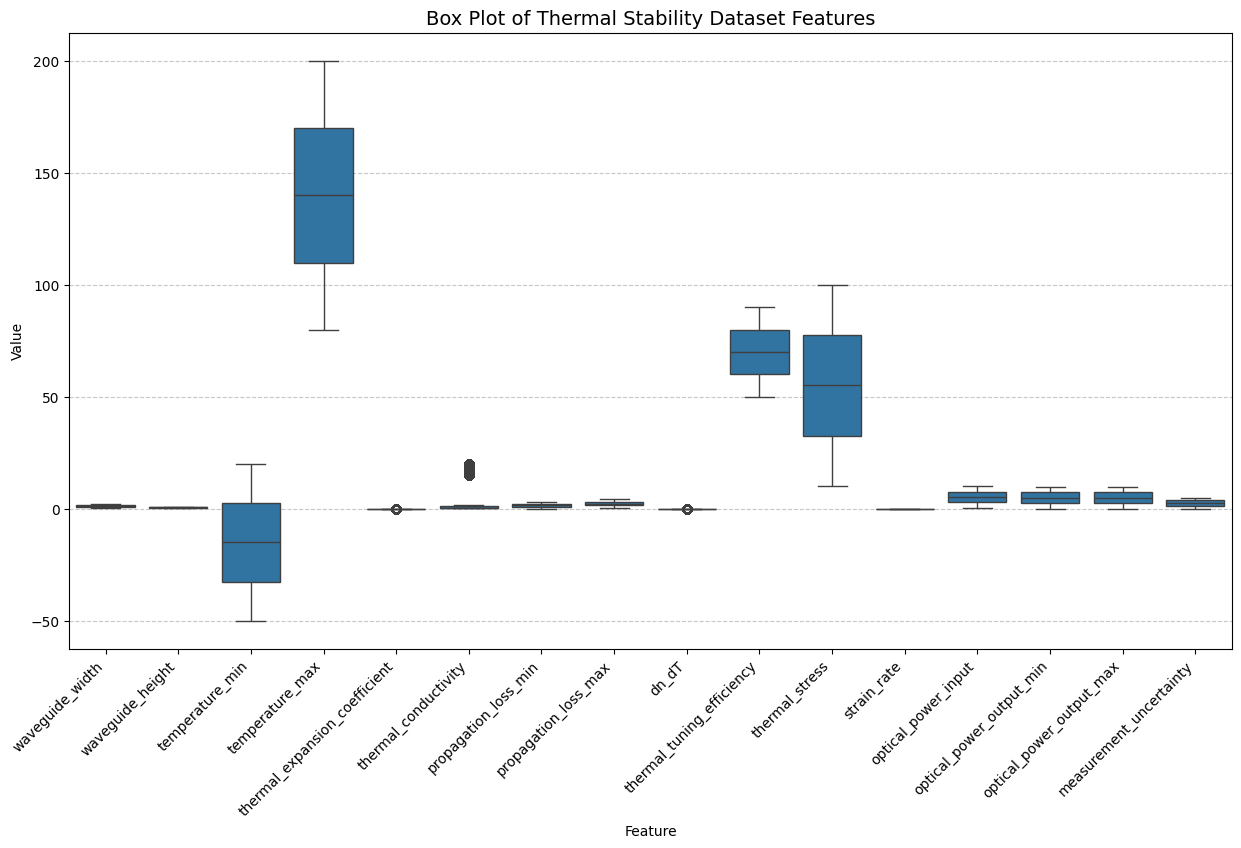

In [109]:
# List of columns for box plots
columns_for_boxplot = [
    "waveguide_width", "waveguide_height",  # Waveguide Dimensions
    "temperature_min", "temperature_max",   # Thermal Parameters
    "thermal_expansion_coefficient", "thermal_conductivity",
    "propagation_loss_min", "propagation_loss_max",  # Optical Performance
    "dn_dT", "thermal_tuning_efficiency",
    "thermal_stress", "strain_rate",  # Environmental and Operational
    "optical_power_input", "optical_power_output_min", "optical_power_output_max",
    "measurement_uncertainty"  # Simulation and Metadata
]

# Melt the dataframe to long format for seaborn
df_melted = df[columns_for_boxplot].melt(var_name="Feature", value_name="Value")

# Create a single box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x="Feature", y="Value", data=df_melted)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")
plt.title("Box Plot of Thermal Stability Dataset Features", fontsize=14)
plt.xlabel("Feature")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Analysis Statistical Outlier detection

### Z Score

In [110]:
# Z-score outlier detection
# Select numerical columns
columns_to_check = df.select_dtypes(include=['float64', 'int64']).columns
# Compute Z-score
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Identify row indices containing outliers
outliers_indices = df[(z_scores > 3).any(axis=1)].index

# Total number of outliers
total_outliers = len(outliers_indices)
print(f"Total number of outliers: {total_outliers}")
# Remove outliers
df = df.drop(outliers_indices)
df.shape

Total number of outliers: 1963


C:\Users\IMPERIAL\AppData\Local\Temp\ipykernel_18272\3253582516.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df[columns_to_check]))


(98037, 26)

### Interquantile Range

In [111]:
# IQR calculation
Q1 = df[columns_to_check].quantile(0.25)  # 25th percentile (Q1)
Q3 = df[columns_to_check].quantile(0.75)  # 75th percentile (Q3)
IQR = Q3 - Q1  # Interquartile Range

# Identify outliers
# Outliers are values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers_mask = (df[columns_to_check] < (Q1 - 1.5 * IQR)) | (df[columns_to_check] > (Q3 + 1.5 * IQR))

# Filter rows with at least one outlier
outliers_df = df[outliers_mask.any(axis=1)]

# Print results
print("Outliers detected using IQR:", outliers_df.shape[0])  # Number of rows with outliers
print("Outliers per column:")
print(outliers_mask.sum())  # Count of outliers in each column

Outliers detected using IQR: 39398
Outliers per column:
waveguide_width                      0
waveguide_height                     0
temperature_min                      0
temperature_max                      0
temperature_step                     0
thermal_expansion_coefficient    19054
thermal_conductivity             19824
refractive_index_core                0
refractive_index_cladding            0
propagation_loss_min                 0
propagation_loss_max                 0
effective_index_min                  0
effective_index_max                  0
dn_dT                              889
thermal_tuning_efficiency            0
thermal_stress                       0
strain_rate                          0
optical_power_input                  0
optical_power_output_min             0
optical_power_output_max             0
wavelength_min                       0
wavelength_max                       0
measurement_uncertainty              0
dtype: int64


## Machine Learning Method to detect Outlier

### Isolation Forest

In [112]:
# Drop missing values for Isolation Forest analysis
df_clean = df[columns_to_check].dropna()

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_clean['Outlier'] = iso_forest.fit_predict(df_clean)

# -1 indicates outliers
outliers_iso = df_clean[df_clean['Outlier'] == -1]

# Show the number of outliers detected
print("Outliers detected using Isolation Forest:", outliers_iso.shape[0])
outliers_iso.head()


Outliers detected using Isolation Forest: 4902


,waveguide_width,waveguide_height,temperature_min,temperature_max,temperature_step,thermal_expansion_coefficient,thermal_conductivity,refractive_index_core,refractive_index_cladding,propagation_loss_min,...,thermal_tuning_efficiency,thermal_stress,strain_rate,optical_power_input,optical_power_output_min,optical_power_output_max,wavelength_min,wavelength_max,measurement_uncertainty,Outlier
57,1.606,0.794,11.5,87.2,1,0.000129,0.16,1.60682,1.47719,2.479,...,53.54,35.22,4.650000e-06,1.54,1.07,1.23,1260,1625,2.15,-1
87,0.989,0.847,-7.7,107.5,10,0.000289,0.20,1.51824,1.00199,2.484,...,81.32,61.37,4.500000e-07,9.66,9.50,9.26,1260,1625,1.48,-1
112,0.808,0.310,18.8,196.9,1,0.000121,0.20,1.43054,1.21916,0.276,...,75.53,48.85,3.600000e-06,7.47,7.10,7.01,1260,1625,2.76,-1
113,1.795,0.877,16.0,110.2,10,0.000208,0.19,1.67965,1.01518,1.899,...,57.28,96.16,3.150000e-06,7.36,7.22,7.13,1260,1625,4.95,-1
159,1.874,0.723,8.7,194.2,10,0.000170,0.19,1.67207,1.12165,0.840,...,52.08,51.71,3.490000e-06,0.74,0.32,0.36,1260,1625,0.10,-1


### Local Outlier Factor

In [113]:
# Clean dataset by dropping NaN values (if any)
df_clean = df[columns_to_check].dropna()

# Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20)
outliers_lof = lof.fit_predict(df_clean)

# Create a new column for outliers (-1 means outlier, 1 means inlier)
df_clean['Outlier'] = outliers_lof

# -1 indicates outliers
df_lof_outliers = df_clean[df_clean['Outlier'] == -1]

# Show the number of outliers detected
print("Outliers detected using LOF:", df_lof_outliers.shape[0])

# Display first few detected outliers
df_lof_outliers.head()

Outliers detected using LOF: 0


,waveguide_width,waveguide_height,temperature_min,temperature_max,temperature_step,thermal_expansion_coefficient,thermal_conductivity,refractive_index_core,refractive_index_cladding,propagation_loss_min,...,thermal_tuning_efficiency,thermal_stress,strain_rate,optical_power_input,optical_power_output_min,optical_power_output_max,wavelength_min,wavelength_max,measurement_uncertainty,Outlier


In [114]:
correlation = df[columns_to_check].corr()["thermal_expansion_coefficient"].sort_values(ascending=False)
print(correlation)

thermal_expansion_coefficient    1.000000
dn_dT                            0.006197
temperature_step                 0.005508
effective_index_max              0.004659
effective_index_min              0.004558
measurement_uncertainty          0.002823
propagation_loss_max             0.002809
refractive_index_core            0.001975
refractive_index_cladding        0.000719
propagation_loss_min             0.000212
waveguide_height                 0.000041
thermal_tuning_efficiency       -0.000588
waveguide_width                 -0.001381
strain_rate                     -0.001763
optical_power_output_min        -0.002572
optical_power_output_max        -0.002632
optical_power_input             -0.002640
temperature_min                 -0.002777
temperature_max                 -0.004519
thermal_stress                  -0.005465
thermal_conductivity            -0.277445
wavelength_min                        NaN
wavelength_max                        NaN
Name: thermal_expansion_coefficien

In [115]:
# Drop the columns 
columns_to_drop = ["thermal_expansion_coefficient", "thermal_conductivity"]
df = df.drop(columns=columns_to_drop)

In [116]:
# IQR calculation
# Columns to check for outliers
columns_to_check = df.select_dtypes(include=['float64','int64']).columns
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers_mask = (df[columns_to_check] < (Q1 - 1.5 * IQR)) | (df[columns_to_check] > (Q3 + 1.5 * IQR))
outlier_IF = df[outliers_mask.any(axis=1)]

# Print results
print("Outliers detected using IQR:", outlier_IF.shape[0])
print("Outliers per column:")
print(outliers_mask.sum())
# Drop outliers
df = df.drop(outlier_IF.index)
df.shape

Outliers detected using IQR: 889
Outliers per column:
waveguide_width                0
waveguide_height               0
temperature_min                0
temperature_max                0
temperature_step               0
refractive_index_core          0
refractive_index_cladding      0
propagation_loss_min           0
propagation_loss_max           0
effective_index_min            0
effective_index_max            0
dn_dT                        889
thermal_tuning_efficiency      0
thermal_stress                 0
strain_rate                    0
optical_power_input            0
optical_power_output_min       0
optical_power_output_max       0
wavelength_min                 0
wavelength_max                 0
measurement_uncertainty        0
dtype: int64


(97148, 24)

### Showing Box plot again after handling Outliers

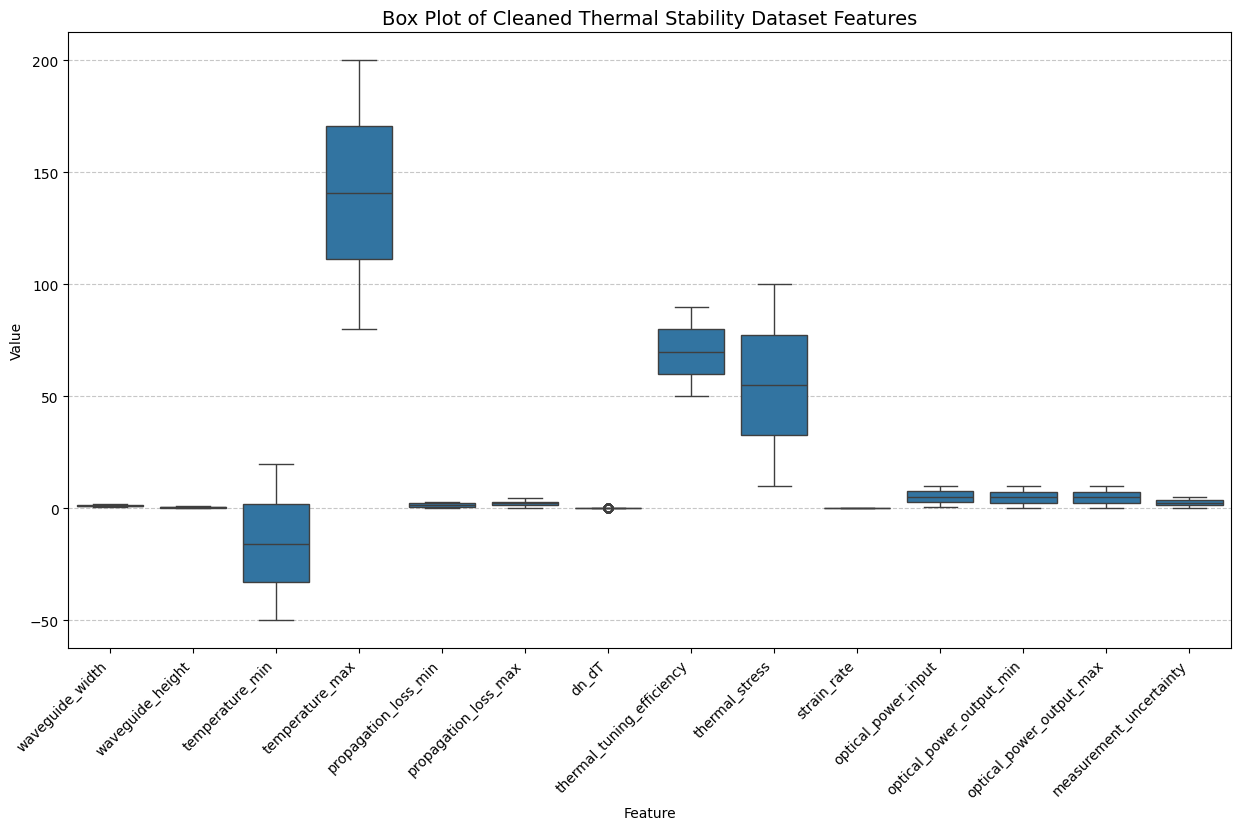

In [117]:
# Box plot of the cleaned dataset
columns_for_boxplot = [
    "waveguide_width", "waveguide_height",  # Waveguide Dimensions
    "temperature_min", "temperature_max",   # Thermal Parameters
    "propagation_loss_min", "propagation_loss_max",  # Optical Performance
    "dn_dT", "thermal_tuning_efficiency",
    "thermal_stress", "strain_rate",  # Environmental and Operational
    "optical_power_input", "optical_power_output_min", "optical_power_output_max",
    "measurement_uncertainty"  # Simulation and Metadata
]
df_melted1 = df[columns_for_boxplot].melt(var_name="Feature", value_name="Value")
plt.figure(figsize=(15, 8))
sns.boxplot(x="Feature", y="Value", data=df_melted1)
plt.xticks(rotation=45, ha="right")
plt.title("Box Plot of Cleaned Thermal Stability Dataset Features", fontsize=14)
plt.xlabel("Feature")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Encoding

In [118]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())

# Display unique values in categorical columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}': {df[col].unique()}")


Categorical columns: ['waveguide_material', 'cladding_material', 'simulation_model']

Unique values in 'waveguide_material': ['SU-8' 'Polymethyl Methacrylate (PMMA)' 'Polydimethylsiloxane (PDMS)'
 'Silicon Dioxide (SiO₂)' 'Silicon Nitride (Si₃N₄)']

Unique values in 'cladding_material': ['Air' 'Silicon Dioxide (SiO₂)']

Unique values in 'simulation_model': ['Finite Element Method (FEM)' 'FDTD']


## Encoding Binary Categorical features
### Manually encoding to avoid Bias

In [119]:
# Manually encode binary categorical features for consistency
df["cladding_material"] = df["cladding_material"].map({"Air": 0, "Silicon Dioxide (SiO₂)": 1})
df["simulation_model"] = df["simulation_model"].map({"Finite Element Method (FEM)": 0, "FDTD": 1})

# Apply One-Hot Encoding for `waveguide_material`
df = pd.get_dummies(df, columns=["waveguide_material"])
# Convert boolean to integer (0/1)
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype(int)
# Display encoded dataset
df.head()

,cladding_material,waveguide_width,waveguide_height,temperature_min,temperature_max,temperature_step,refractive_index_core,refractive_index_cladding,propagation_loss_min,propagation_loss_max,...,optical_power_output_max,wavelength_min,wavelength_max,simulation_model,measurement_uncertainty,waveguide_material_Polydimethylsiloxane (PDMS),waveguide_material_Polymethyl Methacrylate (PMMA),waveguide_material_SU-8,waveguide_material_Silicon Dioxide (SiO₂),waveguide_material_Silicon Nitride (Si₃N₄)
0,0,1.780,0.325,9.7,97.8,1,1.78614,1.12785,2.636,3.782,...,9.39,1260,1625,0,2.80,0,0,1,0,0
1,0,1.660,0.484,-28.1,173.5,1,1.99646,1.32424,2.521,2.952,...,7.98,1260,1625,0,4.38,0,1,0,0,0
2,1,1.493,0.377,-12.9,87.2,5,1.89949,1.21620,2.063,3.367,...,9.69,1260,1625,1,3.90,1,0,0,0,0
3,1,1.439,0.823,9.8,148.7,1,1.67669,1.27030,0.508,0.892,...,5.06,1260,1625,1,4.60,0,0,0,1,0
4,0,1.067,0.319,-37.5,156.8,5,1.46767,1.04754,2.397,3.428,...,4.26,1260,1625,0,4.60,0,0,1,0,0


## Scalling

### Plotting Histrograms to see data distrubustions

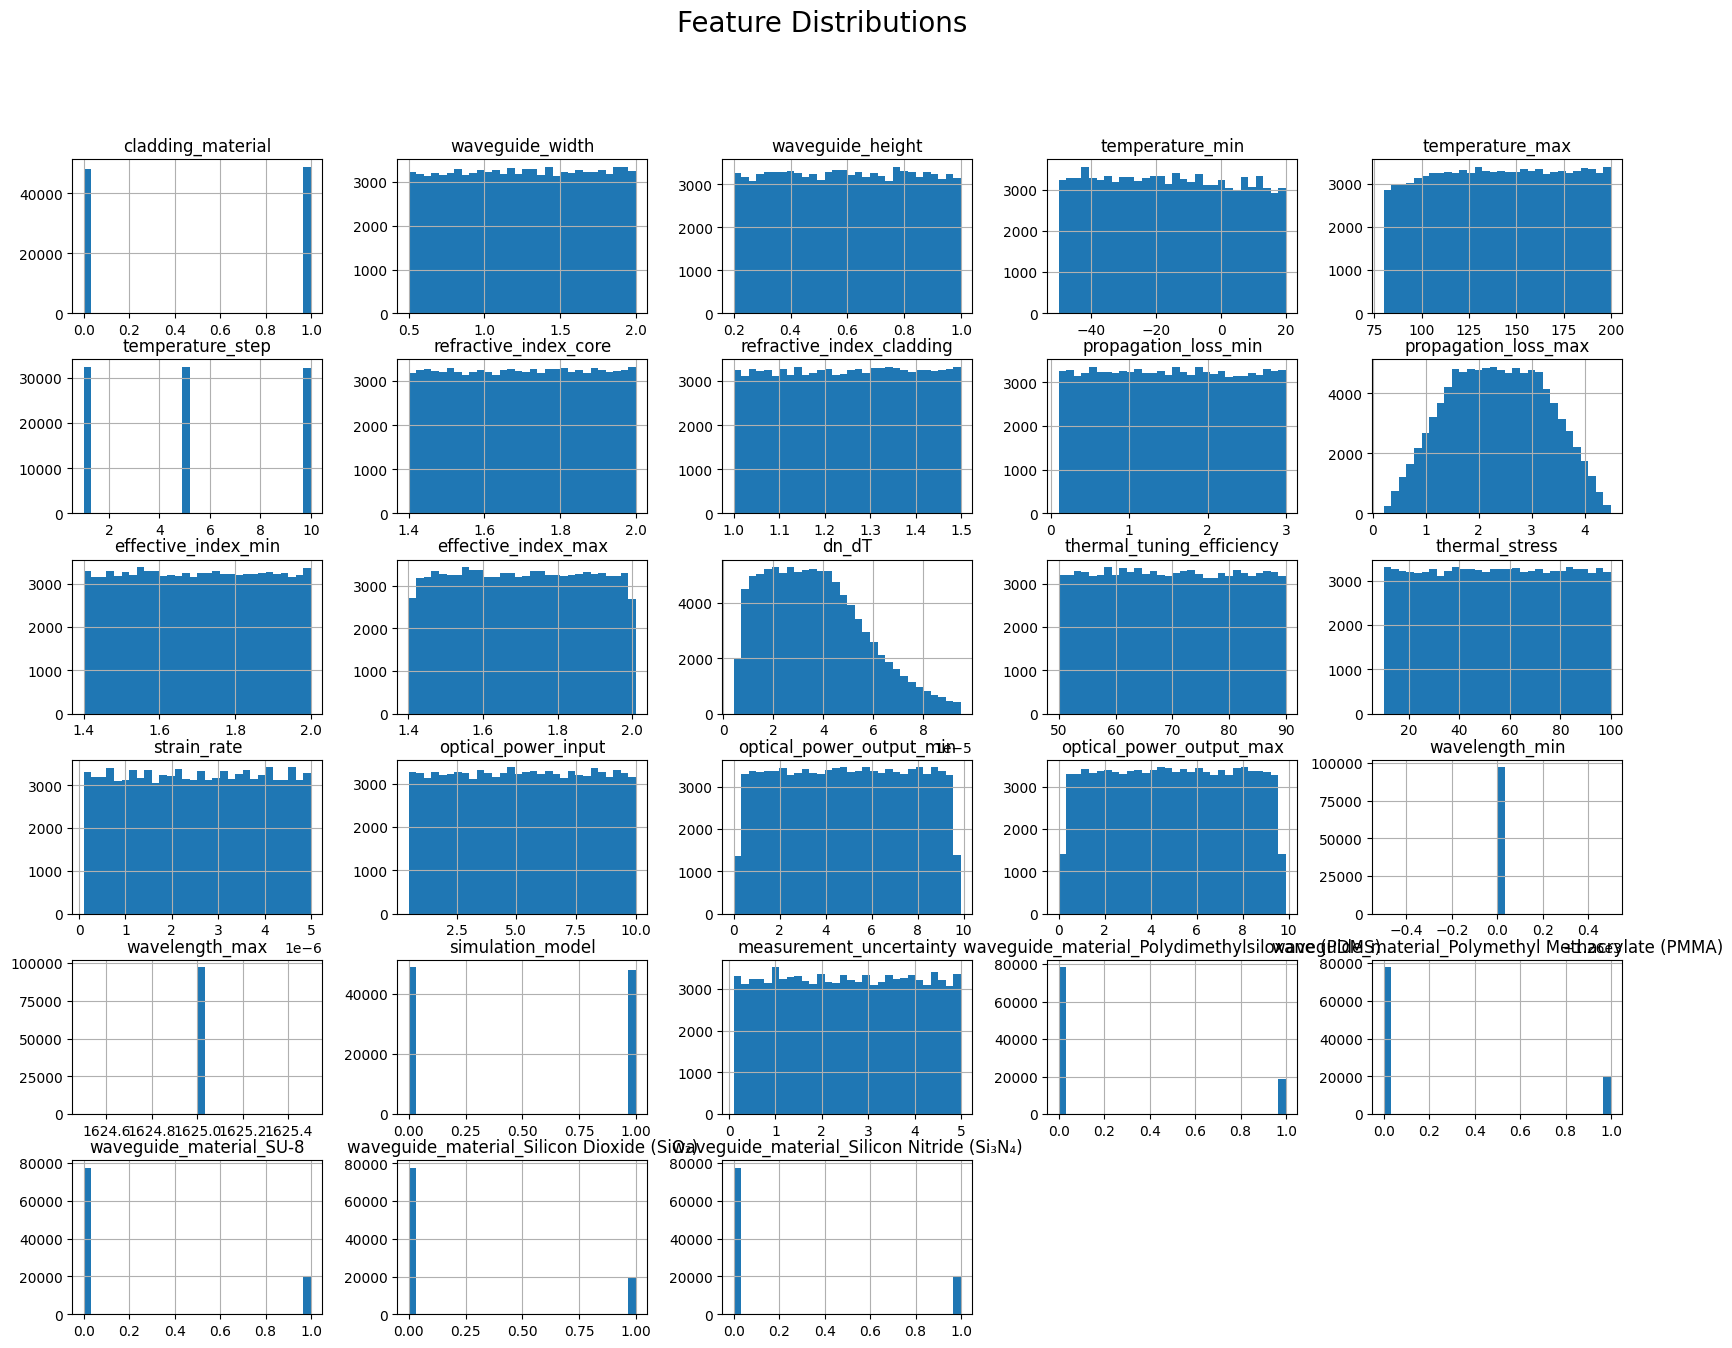

In [120]:
# Plot histograms for all numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(bins=30, figsize=(20, 15))
plt.suptitle('Feature Distributions', fontsize=20)
plt.show()

In [121]:
# List of features to exclude (adjust if needed)
exclude_features = [
    'waveguide_material', 'cladding_material', 'simulation_model',
    'temperature_step'
]
# Select numerical features excluding the ones above
numerical_features = [col for col in df.columns if col not in exclude_features]
print(numerical_features)


['waveguide_width', 'waveguide_height', 'temperature_min', 'temperature_max', 'refractive_index_core', 'refractive_index_cladding', 'propagation_loss_min', 'propagation_loss_max', 'effective_index_min', 'effective_index_max', 'dn_dT', 'thermal_tuning_efficiency', 'thermal_stress', 'strain_rate', 'optical_power_input', 'optical_power_output_min', 'optical_power_output_max', 'wavelength_min', 'wavelength_max', 'measurement_uncertainty', 'waveguide_material_Polydimethylsiloxane (PDMS)', 'waveguide_material_Polymethyl Methacrylate (PMMA)', 'waveguide_material_SU-8', 'waveguide_material_Silicon Dioxide (SiO₂)', 'waveguide_material_Silicon Nitride (Si₃N₄)']


In [122]:
print(df.head())

   cladding_material  waveguide_width  waveguide_height  temperature_min  \
0                  0            1.780             0.325              9.7   
1                  0            1.660             0.484            -28.1   
2                  1            1.493             0.377            -12.9   
3                  1            1.439             0.823              9.8   
4                  0            1.067             0.319            -37.5   

   temperature_max  temperature_step  refractive_index_core  \
0             97.8                 1                1.78614   
1            173.5                 1                1.99646   
2             87.2                 5                1.89949   
3            148.7                 1                1.67669   
4            156.8                 5                1.46767   

   refractive_index_cladding  propagation_loss_min  propagation_loss_max  ...  \
0                    1.12785                 2.636                 3.782  ...   
1 

### Applying Standard Scaling to Normal distrubution data

In [123]:
scaler = StandardScaler()

# Fit and transform the numerical features
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the result
print(df_scaled.head())


   cladding_material  waveguide_width  waveguide_height  temperature_min  \
0                  0         1.216288         -1.192365         1.253003   
1                  0         0.939236         -0.502219        -0.625370   
2                  1         0.553672         -0.966657         0.129955   
3                  1         0.428999          0.969225         1.257973   
4                  0        -0.429863         -1.218408        -1.092479   

   temperature_max  temperature_step  refractive_index_core  \
0        -1.255501                 1               0.493670   
1         0.949504                 1               1.707225   
2        -1.564260                 5               1.147704   
3         0.227125                 1              -0.137861   
4         0.463063                 5              -1.343916   

   refractive_index_cladding  propagation_loss_min  propagation_loss_max  ...  \
0                  -0.852865              1.299475              1.541624  ...   
1 

### Before and After Scaling

In [124]:
df.describe()

,cladding_material,waveguide_width,waveguide_height,temperature_min,temperature_max,temperature_step,refractive_index_core,refractive_index_cladding,propagation_loss_min,propagation_loss_max,...,optical_power_output_max,wavelength_min,wavelength_max,simulation_model,measurement_uncertainty,waveguide_material_Polydimethylsiloxane (PDMS),waveguide_material_Polymethyl Methacrylate (PMMA),waveguide_material_SU-8,waveguide_material_Silicon Dioxide (SiO₂),waveguide_material_Silicon Nitride (Si₃N₄)
count,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,...,97148.000000,97148.0,97148.0,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000
mean,0.503345,1.253187,0.599704,-15.515184,140.902576,5.319790,1.700583,1.251000,1.547842,2.351177,...,4.950403,1260.0,1625.0,0.496325,2.549652,0.194404,0.200900,0.202773,0.199932,0.201991
std,0.499991,0.433134,0.230387,20.123901,34.331161,3.680068,0.173310,0.144396,0.837387,0.928132,...,2.742398,0.0,0.0,0.499989,1.415782,0.395744,0.400675,0.402067,0.399951,0.401487
min,0.000000,0.500000,0.200000,-50.000000,80.000000,1.000000,1.400000,1.000010,0.100000,0.205000,...,0.000000,1260.0,1625.0,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.880000,0.400000,-32.900000,111.500000,1.000000,1.550190,1.126208,0.823000,1.623000,...,2.580000,1260.0,1625.0,0.000000,1.320000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.254000,0.600000,-15.700000,141.000000,5.000000,1.701050,1.252220,1.548000,2.347000,...,4.950000,1260.0,1625.0,0.000000,2.550000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.628000,0.799000,1.800000,170.600000,10.000000,1.850493,1.375602,2.268000,3.076000,...,7.320000,1260.0,1625.0,1.000000,3.770000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,1.000000,20.000000,200.000000,10.000000,2.000000,1.499990,3.000000,4.496000,...,9.890000,1260.0,1625.0,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
df_scaled.describe()

,cladding_material,waveguide_width,waveguide_height,temperature_min,temperature_max,temperature_step,refractive_index_core,refractive_index_cladding,propagation_loss_min,propagation_loss_max,...,optical_power_output_max,wavelength_min,wavelength_max,simulation_model,measurement_uncertainty,waveguide_material_Polydimethylsiloxane (PDMS),waveguide_material_Polymethyl Methacrylate (PMMA),waveguide_material_SU-8,waveguide_material_Silicon Dioxide (SiO₂),waveguide_material_Silicon Nitride (Si₃N₄)
count,97148.000000,9.714800e+04,9.714800e+04,9.714800e+04,9.714800e+04,97148.000000,9.714800e+04,9.714800e+04,9.714800e+04,9.714800e+04,...,9.714800e+04,97148.0,97148.0,97148.000000,9.714800e+04,9.714800e+04,9.714800e+04,9.714800e+04,9.714800e+04,9.714800e+04
mean,0.503345,4.987067e-16,-1.462805e-16,-6.743529e-17,-2.770552e-16,5.319790,-1.162564e-16,1.487672e-16,5.529402e-17,-5.119816e-16,...,-1.591531e-16,0.0,0.0,0.496325,4.797999e-17,-5.361179e-17,-5.650083e-17,-2.633048e-17,-1.974786e-18,-1.404292e-17
std,0.499991,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,3.680068,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,0.0,0.0,0.499989,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,0.000000,-1.738934e+00,-1.734933e+00,-1.713634e+00,-1.773983e+00,1.000000,-1.734375e+00,-1.738211e+00,-1.729010e+00,-2.312375e+00,...,-1.805146e+00,0.0,0.0,0.000000,-1.730255e+00,-4.912409e-01,-5.014053e-01,-5.043293e-01,-4.998938e-01,-5.031087e-01
25%,0.000000,-8.616022e-01,-8.668246e-01,-8.638934e-01,-8.564443e-01,1.000000,-8.677718e-01,-8.642401e-01,-8.656050e-01,-7.845668e-01,...,-8.643587e-01,0.0,0.0,0.000000,-8.685365e-01,-4.912409e-01,-5.014053e-01,-5.043293e-01,-4.998938e-01,-5.031087e-01
50%,1.000000,1.876687e-03,1.283916e-03,-9.183950e-03,2.837772e-03,5.000000,2.696844e-03,8.449948e-03,1.881745e-04,-4.500970e-03,...,-1.470626e-04,0.0,0.0,0.000000,2.454563e-04,-4.912409e-01,-5.014053e-01,-5.043293e-01,-4.998938e-01,-5.031087e-01
75%,1.000000,8.653556e-01,8.650519e-01,8.604332e-01,8.650327e-01,10.000000,8.649865e-01,8.629261e-01,8.600104e-01,7.809520e-01,...,8.640646e-01,0.0,0.0,1.000000,8.619642e-01,-4.912409e-01,-5.014053e-01,-5.043293e-01,-4.998938e-01,-5.031087e-01
max,1.000000,1.724217e+00,1.737501e+00,1.764835e+00,1.721402e+00,10.000000,1.727651e+00,1.724362e+00,1.734163e+00,2.310915e+00,...,1.801206e+00,0.0,0.0,1.000000,1.730746e+00,2.035661e+00,1.994394e+00,1.982832e+00,2.000425e+00,1.987642e+00


In [126]:
df=df_scaled

## # Exploratory Data Analysis

C:\Users\IMPERIAL\AppData\Local\Temp\ipykernel_18272\4040759365.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["waveguide_width"], shade=True)


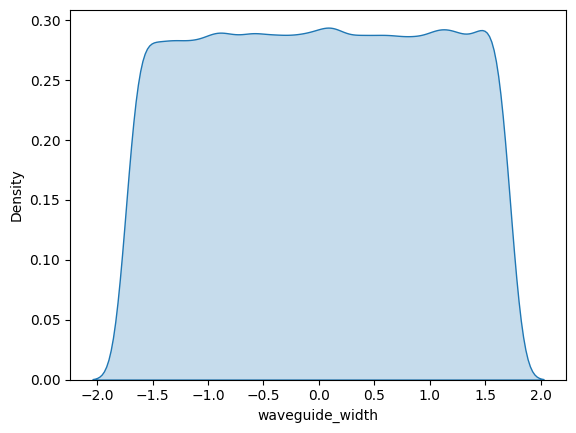

In [127]:
sns.kdeplot(df["waveguide_width"], shade=True)
plt.show()

### Bar plots for binary and categorical features Vs Counts

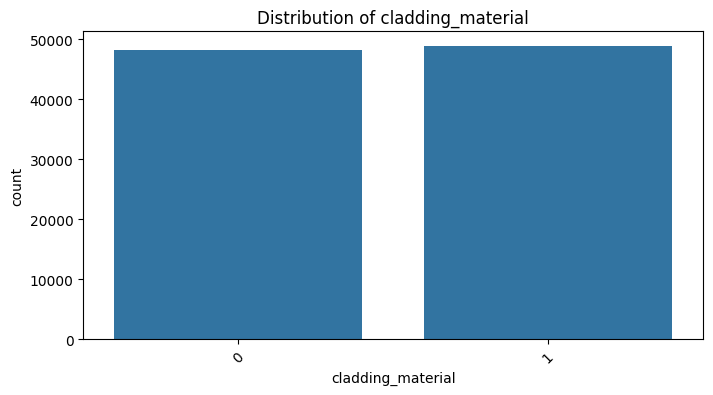

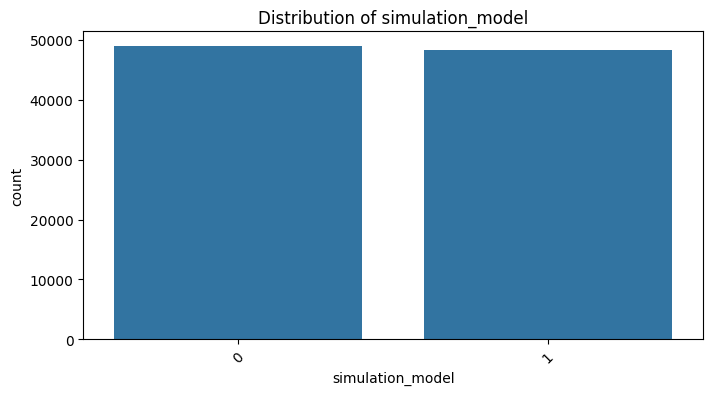

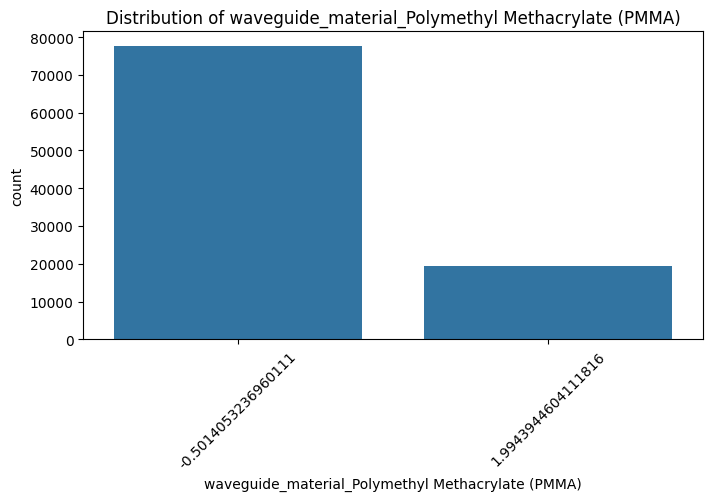

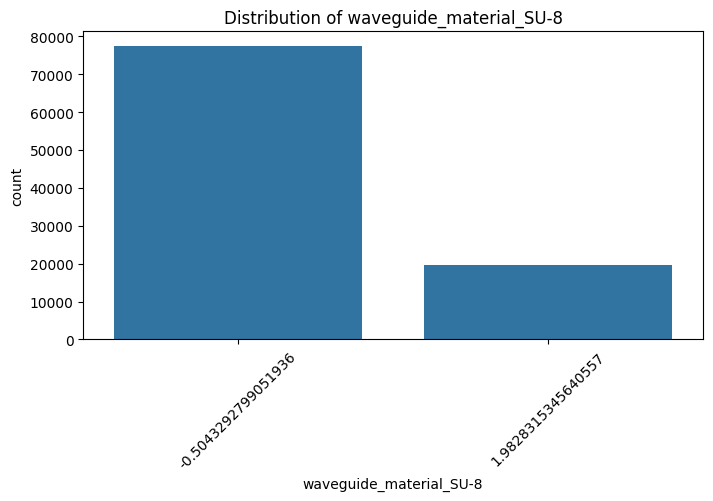

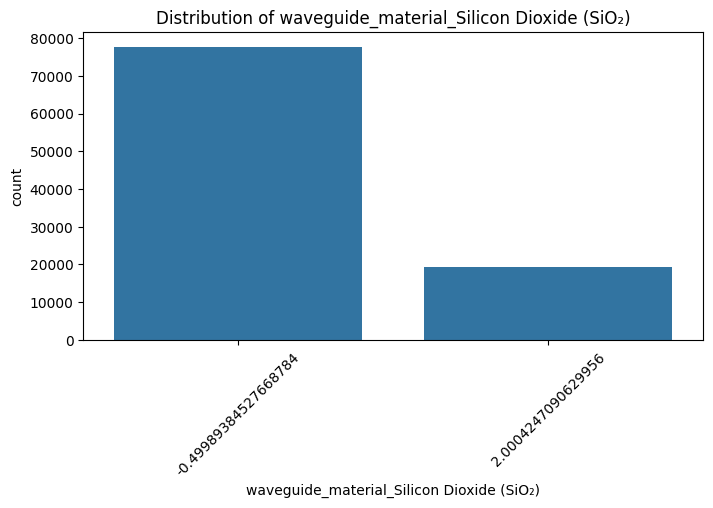

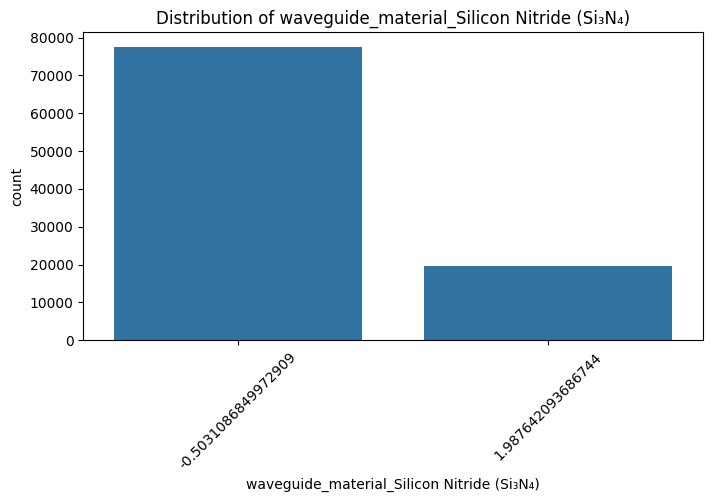

In [128]:
for col in ["cladding_material", "simulation_model", 
            "waveguide_material_Polymethyl Methacrylate (PMMA)", 
            "waveguide_material_SU-8", 
            "waveguide_material_Silicon Dioxide (SiO₂)", 
            "waveguide_material_Silicon Nitride (Si₃N₄)"]:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=df[col])
        plt.xticks(rotation=45)
        plt.title(f"Distribution of {col}")
        plt.show()
    else:
        print(f"Column {col} does not exist in the dataframe.")


### Correlation Matrix

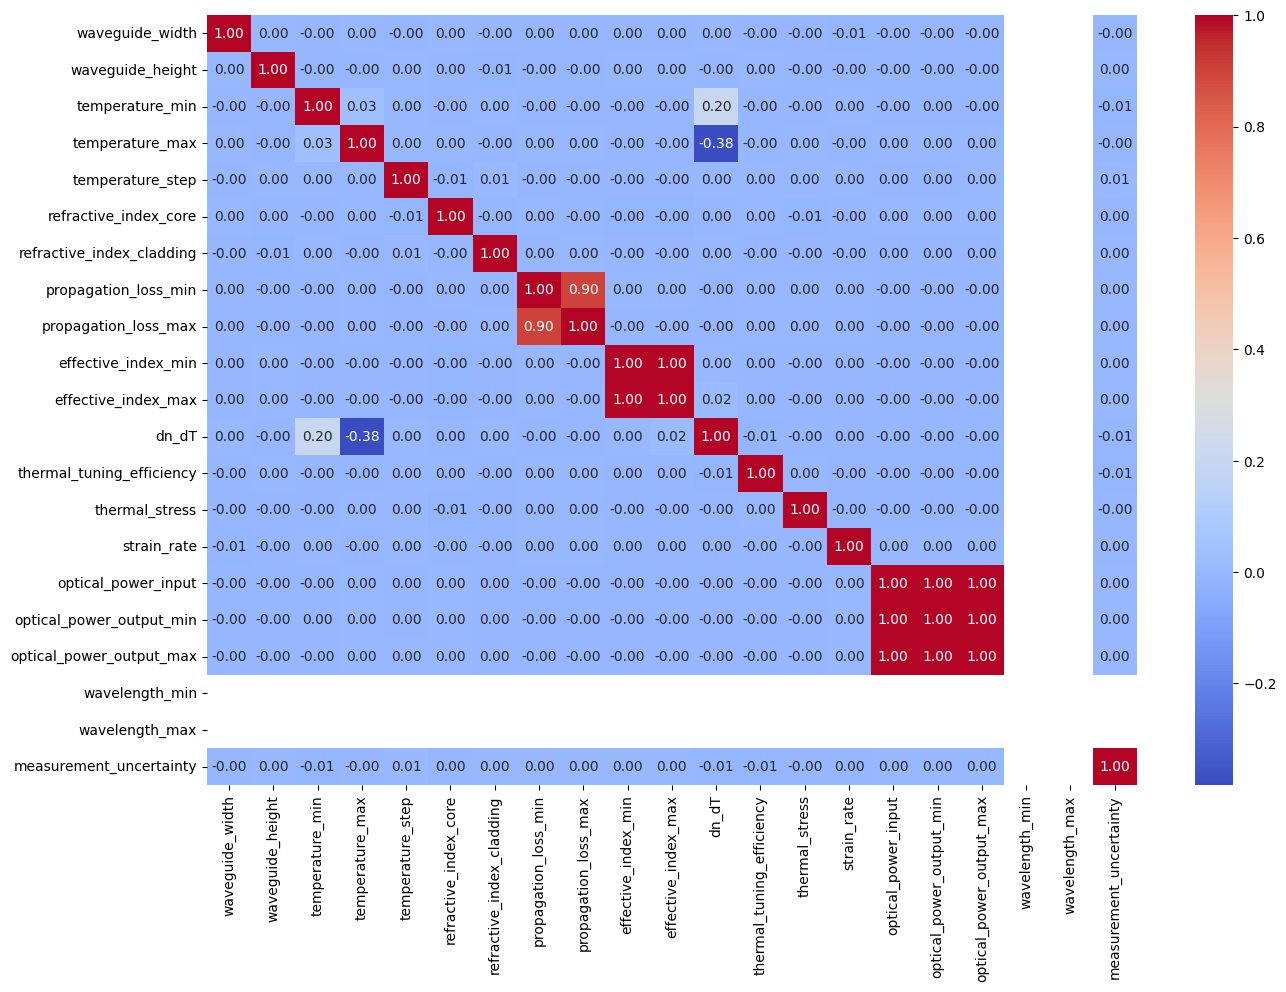

In [129]:
# Correlation matrix
correlation_matrix = df[columns_to_check].corr()

# Plot the correlation matrix

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()